In [6]:
import qiskit
import numpy as np

In [14]:
def qiskit_get_unitary(circuit):
    backend = qiskit.BasicAer.get_backend('unitary_simulator')
    job = qiskit.execute(circuit, backend)
    return job.result().get_unitary()

def qiskit_get_statevector(circuit):
    backend = qiskit.BasicAer.get_backend('statevector_simulator')
    job = qiskit.execute(circuit, backend)
    return job.result().get_statevector()

In [22]:
state_vector = np.array([np.sqrt(0.25), np.sqrt(0.25), np.sqrt(0.25), np.sqrt(0.25)])
custom = qiskit.aqua.components.initial_states.Custom(2, state_vector=state_vector)
qc = custom.construct_circuit()
qc.draw()

┌───┐┌───────────┐┌───┐┌──────────────┐┌───┐»
q_0: ─────────────────────────┤ X ├┤ U3(0,0,0) ├┤ X ├┤ U3(pi/2,0,0) ├┤ X ├»
     ┌──────────────┐┌───────┐└─┬─┘└───────────┘└─┬─┘└──────────────┘└─┬─┘»
q_1: ┤ U3(pi/2,0,0) ├┤ U1(0) ├──■─────────────────■────────────────────■──»
     └──────────────┘└───────┘                                            »
«     ┌───────┐┌───┐┌───────┐
«q_0: ┤ U1(0) ├┤ X ├┤ U1(0) ├
«     └───────┘└─┬─┘└───────┘
«q_1: ───────────■───────────
«

In [44]:
n = 2
state_vector = np.array([np.sqrt(0.25), np.sqrt(0.25), np.sqrt(0.25), np.sqrt(0.25)])
qc = qiskit.QuantumCircuit(n, name='qc')
qc.initialize(state_vector, range(n))
qc = qiskit.aqua.utils.circuit_utils.convert_to_basis_gates(qc)
qc.draw()

┌───┐┌───────────┐┌───┐┌──────────────┐┌───┐»
q_0: ─|0>──────────────────────────┤ X ├┤ U3(0,0,0) ├┤ X ├┤ U3(pi/2,0,0) ├┤ X ├»
          ┌──────────────┐┌───────┐└─┬─┘└───────────┘└─┬─┘└──────────────┘└─┬─┘»
q_1: ─|0>─┤ U3(pi/2,0,0) ├┤ U1(0) ├──■─────────────────■────────────────────■──»
          └──────────────┘└───────┘                                            »
«     ┌───────┐┌───┐┌───────┐
«q_0: ┤ U1(0) ├┤ X ├┤ U1(0) ├
«     └───────┘└─┬─┘└───────┘
«q_1: ───────────■───────────
«

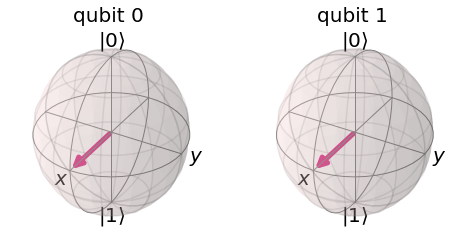

In [46]:
qiskit.visualization.plot_bloch_multivector(qiskit_get_statevector(qc))